In [26]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
data = housing.data
target = housing.target

df = pd.DataFrame(data, columns=housing.feature_names)
df['PRICE'] = target

In [34]:
df.head(5), type(df)

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  PRICE  
 0    -122.23  4.526  
 1    -122.22  3.585  
 2    -122.24  3.521  
 3    -122.25  3.413  
 4    -122.25  3.422  ,
 pandas.core.frame.DataFrame)

In [25]:
df.shape

(20640, 9)

In [35]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


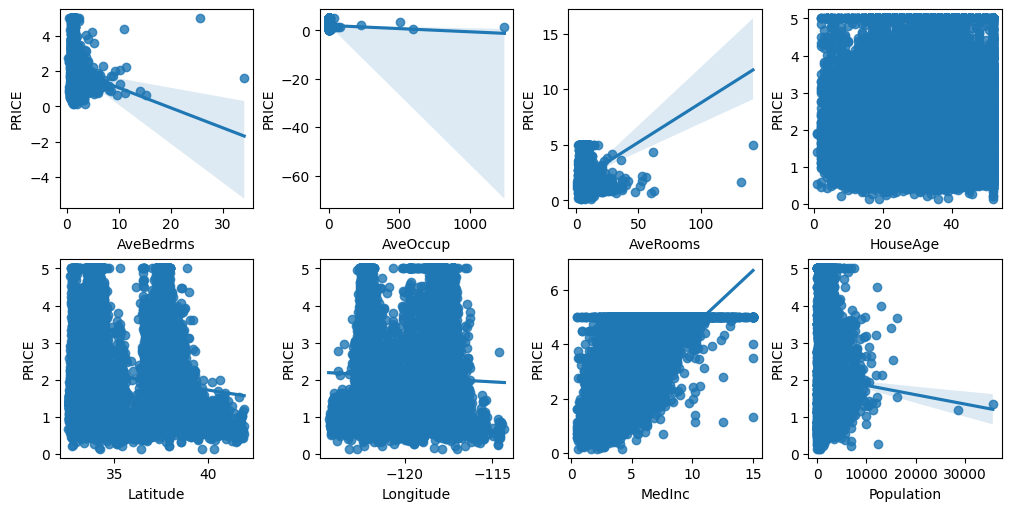

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize = (10, 5), ncols = 4, nrows = 2, constrained_layout = True)
features = df.columns.difference(['PRICE']) # price를 제외한 features &  df.drop(columns = 'PRICE')

for i, feature in zip(range(12), features):
  row = int(i/4)
  col = i%4
  sns.regplot(x = feature, y = df['PRICE'], data = df, ax = axes[row][col]) # 산점도와 선형회괴선 함께 출력

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [47]:
from sklearn.model_selection import train_test_split

x = df[['MedInc',	'HouseAge',	'AveRooms'	,'AveBedrms'	,'Population'	,'AveOccup'	,'Latitude',	'Longitude']].values
y = df['PRICE'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
print('학습데이터 세트 PRICE 평균', y_train.mean())
print('평가데이터 세트 PRICE 평균', y_test.mean())

학습데이터 세트 PRICE 평균 2.071946937378876
평가데이터 세트 PRICE 평균 2.0550030959302323


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaler = scaler.fit_transform(x_train)

In [52]:
from sklearn.linear_model import LinearRegression
liner = LinearRegression()
liner.fit(x_train_scaler, y_train)


LinearRegression()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = liner.predict(x_train_scaler)
mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMAE: {rmse:.4f}') # numpy의 단일값 형태이므로 출력가능
print(f'R2: {r2:.4f}')

MAE: 0.5286
MSE: 0.5179
RMAE: 0.7197
R2: 0.6126


In [59]:
x_test_scaled = scaler.transform(x_test) # fit은 필요없음
pred = liner.predict(x_test_scaled)

In [61]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'MAE {np.round(mae, 4)}')
print(f'MSE {np.round(mse, 4)}')
print(f'RMSE {np.round(rmse, 4)}')
print(f'R2 {np.round(r2, 4)}')

MAE 0.5332
MSE 0.5559
RMSE 0.7456
R2 0.5758


In [62]:
pred_df = pd.DataFrame(pred, columns = ['pred_Price'])

In [63]:
pred_df.head()

,pred_Price
0,0.719123
1,1.764017
2,2.709659
3,2.838926
4,2.604657


In [64]:
actual = pd.DataFrame(y_test, columns = ['actual Price'])
actual.head()

,actual Price
0,0.47700
1,0.45800
2,5.00001
3,2.18600
4,2.78000


In [65]:
reg_result = pd.concat([actual, pred_df], axis = 1)
reg_result.to_csv('reg_result.csv', index = False, encoding = 'utf-8-sig')
reg_result.head()

,actual Price,pred_Price
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


In [86]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
#iris = iris.data
#iris_label = iris.target 로 쓰면 iris = iris.data 코드 때문에 iris는 NumPy 배열이 되어 iris 속성의 target에 접근이 안되므로 다른 이름을 써야됨
data = iris.data
iris_label = iris.target
df= pd.DataFrame(data = data, columns = iris.feature_names)
df['label'] = iris_label
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
df['label'].unique()

array([0, 1, 2])

In [88]:
df.shape

(150, 5)

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, iris_label, test_size = 0.2, random_state = 0, stratify = iris_label)
#stratify 파라미터에 타겟 변수를 지정하면, train_test_split 함수는 학습 데이터와 테스트 데이터에 클래스의 비율이 원본 데이터셋의 클래스 비율과 유사하도록 데이터를 나눔


In [90]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth = 5, random_state = 100)
dtree_clf_3 = DecisionTreeClassifier(max_depth = 3, random_state = 100)
dtree_clf_1 = DecisionTreeClassifier(max_depth = 1, random_state = 100)


In [93]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring = 'accuracy', cv = 10) #cv = 10 번 평가
print('교차검증 정확도', np.round(scores, 3))
print('평균검증 정확도', np.round(np.mean(scores), 4))

교차검증 정확도 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
평균검증 정확도 1.0


In [95]:
scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring = 'accuracy', cv = 10)
print('교차검증 정확도', np.round(scores, 3))
print('평균검증 정확도', np.round(scores, 3))


교차검증 정확도 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
평균검증 정확도 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [96]:
scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring = 'accuracy', cv = 10)
print('교차검증 정확도', np.round(scores, 3))
print('평균검증 정확도', np.round(scores, 3))

교차검증 정확도 [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균검증 정확도 [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]


In [99]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print('의사결정나무(교차검증 후)예측정확도:', acc)
print(f'의사결정나무(교차검증 후) 예측정확도: {acc:.3f}')
print('의사결정나무(교차검증 후) 예측정확도: {:.5f}'.format(acc))

의사결정나무(교차검증 후)예측정확도: 1.0
의사결정나무(교차검증 후) 예측정확도: 1.000
의사결정나무(교차검증 후) 예측정확도: 1.00000


In [100]:
pred = pd.DataFrame(pred, columns = ['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,2
4,0


In [101]:
actual = pd.DataFrame(y_test, columns = ['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,0
3,2
4,0


In [102]:
classify_result = pd.concat([actual, pred], axis = 1)
classify_result.to_csv('clf_result.csv', index = False, encoding = 'utf-8-sig')
classify_result.head()

,actual Species,pred Species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0
